In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
from operator import attrgetter
import matplotlib.colors as mcolors

In [2]:
df_sales = pd.read_csv('Sales_Transaction_v4a.csv')

# Data Cleansing
Eksekusi 2 code dibawah ini

In [3]:
# 1. Ubah kolom Date menjadi tipe datetime
df_sales['Date']= pd.to_datetime(df_sales['Date'])

# 2. Buang semua transaksi yang memiliki quantity negative atau yang TransactionNo diawali dengan C
df_sales = df_sales[df_sales['TransactionNo'].str[0]!='C']

# Top Contributing products<a href="#Top-Contributing-products" class="anchor-link">¶</a>

Pada retail store, ada banyak jenis barang yang dijual. Memahami
karakteristik penjualan di setiap barang sangatlah penting.  
Barang-barang dengan minat tinggi dari customer menjadi kunci bisnis
untuk meraih untung. Barang-barang dengan minat rendah dari masyarakat
akan menjadi beban dari usaha apabila bisnis menyetok terlalu banyak.

Salah satu metode segmentasi yang digunakan adalah menggunakan
segmentasi berdasarkan :

-   Volume transaksi : Berapa banyak transaksi yang melibatkan suatu
    produk (Tidak mempedulikan banyaknya barang dalam 1 transaksi)
-   Revenue total : Berapa dolar revenue yang dihasilkan dari penjualan
    produk ini.

Buatlah segmentasi produk berdasarkan volume dan revenue total dengan
aturan sebagai berikut :

1.  total_revenue didefinisikan sebagai perkalian harga barang dengan
    banyaknya pembelian

In [110]:
df_sales['total_revenue']= df_sales['Price'] * df_sales['Quantity'].sort_values(ascending = True)

2.  20% produk dengan volume  transaksi tertinggi masuk
    kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya
    masuk ke kategori "Low"

In [111]:
populer_quantity = df_sales['Quantity'].quantile(0.20)
normal_quantity = df_sales['Quantity'].quantile(0.80)
def categorize(revenue):
    if revenue >= populer_quantity:
        return 'Populer'
    elif revenue >= normal_quantity:
        return 'Normal'
    else:
        return 'Rendah'

df_sales['quantity_category'] = df_sales['Quantity'].apply(categorize)
df_sales['quantity_category'].value_counts()

Populer    527765
Name: quantity_category, dtype: int64

3.  20% produk dengan total revenue tertinggi masuk kategori "Popular".
    20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"

In [112]:
populer_total_revenue = df_sales['total_revenue'].quantile(0.20)
normal_total_revenue = df_sales['total_revenue'].quantile(0.80)
def categorize(revenue):
    if revenue >= populer_total_revenue:
        return 'Populer'
    elif revenue >= normal_total_revenue:
        return 'Normal'
    else:
        return 'Low'

df_sales['total_revenue_category'] = df_sales['total_revenue'].apply(categorize)
df_sales['total_revenue_category'].value_counts()

Populer    423443
Low        104322
Name: total_revenue_category, dtype: int64

4. Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang disebutkan masuk ke kategori "Normal"

In [113]:
def categorize(row):
    if row['quantity_category'] == 'Populer' and row['total_revenue_category'] == 'Populer':
        return 'Super Populer'
    elif row['quantity_category'] == 'Populer' and row['total_revenue_category'] == 'Normal':
        return 'Populer'
    else:
        return 'Low'
df_sales['final_segmentation'] = df_sales.apply(categorize, axis=1)
df_sales['final_segmentation'].value_counts()

Super Populer    423443
Low              104322
Name: final_segmentation, dtype: int64

In [8]:
df_sales.tail(1)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total_revenue,quantity_category,total_revenue_category,final_segmentation
536324,536597,2018-12-01,22220,Cake Stand Lovebird 2 Tier White,20.45,1,18011.0,United Kingdom,20.45,Populer,Populer,Super Populer


## Pertanyaan<a href="#Pertanyaan" class="anchor-link">¶</a>

1.  Barang tipe apa yang masuk ke kategori super populer pada bulan
    November 2019?

In [9]:
#Category super populer November 2019
df_filter_date = df_sales[(df_sales['Date'] > '2019-11-01') & (df_sales['Date'] <= '2019-11-30')]
df_filter_segmentation = df_filter_date[df_filter_date['final_segmentation']=='Super Populer']
df_tipe_product_november_2019_super_populer = df_filter_segmentation.groupby('ProductName')['CustomerNo'].count().sort_values(ascending=False)
df_tipe_product_november_2019_super_populer

ProductName
Rabbit Night Light                   444
Paper Chain Kit 50'S Christmas       334
Hot Water Bottle Keep Calm           271
Popcorn Holder                       238
Paper Chain Kit Vintage Christmas    233
                                    ... 
Rose Scent Candle In Jewelled Box      1
Green Murano Twist Necklace            1
Carousel Design Washbag                1
Ubo-Light Triobase Purple              1
Painted Yellow Wooden Daisy            1
Name: CustomerNo, Length: 2671, dtype: int64

2.  Apakah barang yang populer di November 2019 sama dengan barang yang
    populer di July 2019?
    
    Tidak ada barang dengan kategori populer, karena jumlah final segmentation hanya terdiri dari Super Populer    423443 dan Low              104322

3.  Apakah barang yang masuk kategori super populer di november 2019 sama
    dengan barang super populer di July 2019 ?
    
    Berbeda, karena jumlah super populer di : 
    
    -November 2019 = 2671
    
    -Juli 2019 = 2449

In [10]:
#Category super populer July 2019
df_filter_date = df_sales[(df_sales['Date'] > '2019-07-01') & (df_sales['Date'] <= '2019-07-31')]
df_filter_segmentation = df_filter_date[df_filter_date['final_segmentation']=='Super Populer']
df_tipe_product_july_2019_super_populer = df_filter_segmentation.groupby('ProductName')['CustomerNo'].count().sort_values(ascending=False)
df_tipe_product_july_2019_super_populer

ProductName
Party Bunting                         183
Spotty Bunting                        173
Cream Hanging Heart T-Light Holder    157
Jumbo Bag Red Retrospot               148
Set Of 3 Regency Cake Tins            143
                                     ... 
Blue Rose Fabric Mirror                 1
Hardman Mug 3 Assorted                  1
Magic Drawing Slate Go To The Fair      1
Stripes Design Teddy                    1
Zinc Wire Sweetheart Letter Tray        1
Name: CustomerNo, Length: 2449, dtype: int64

# Retention Cohort Analysis<a href="#Retention-Cohort-Analysis" class="anchor-link">¶</a>

Analisis kohort adalah metode analisis yang digunakan untuk mempelajari
perilaku konsumen atau pengguna dari kelompok yang sama dalam periode
waktu tertentu.  
Contoh Kohort : Kohort kustomer yang bergabung pada bulan mei

Analisis retensi adalah analisis untuk melihat seberapa besar persentase
pengguna atau pelanggan yang kembali menggunakan produk atau layanan
dalam periode waktu tertentu.

Dengan menganalisis kohort dan retensi, perusahaan atau organisasi dapat
mengidentifikasi tren dan pola dalam perilaku pengguna atau pelanggan.

Berikut cuplikan matriks retensi yang akan kalian hasilkan pada bagian
ini :



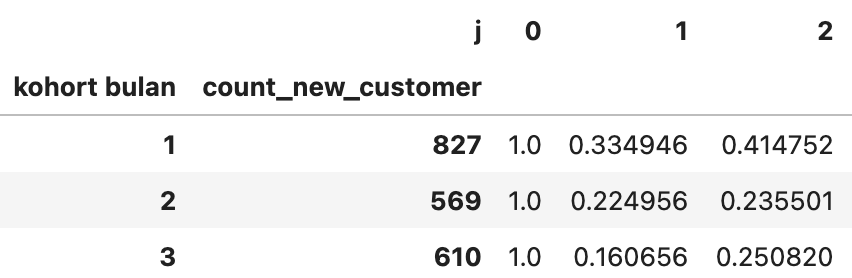

Cara baca :  
Pada bulan januari, ada 827 customer baru.  
33% dari 827 customer melakukan transaksi 1 bulan kemudian.  
41.4% dari 827 customer melakukan transasksi 2 bulan kemduain.

Hal ini menunjukkan bahwa sekitar sepertiga customer yang melanjutkan
transaksi setelah mendaftar pada bulan januari.

Sedangkan pada kohort bulan februari, ada 569 customer baru dan hanya
22% customer yang kembali bertransaksi sebulan setelahnya

Buatlah matriks kohort retensi per bulan menggunakan data dari 1 januari
2019 hingga 30 november 2019 Petunjuk :

1.  Hitung tanggal berapa transaksi pertama customer. Disini kita
    menggunakna asumsi bahwa transaksi pertama pada tahun 2019 adalah
    transaksi pertama customer.

In [11]:
#Filtering year 2019 only
df_sales_2019 = df_sales[(df_sales['Date'] > '2019-01-01') & (df_sales['Date'] < '2019-12-09')]

In [12]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create transaction_date column based on month and store in TransactionMonth
df_sales_2019['TransactionMonth'] = df_sales_2019['Date'].apply(get_month) 

# Grouping by customer_id and select the InvoiceMonth value
grouping = df_sales_2019.groupby('CustomerNo')['TransactionMonth'] 

# Assigning a minimum InvoiceMonth value to the dataset
df_sales_2019['CohortMonth'] = grouping.transform('min')

# printing
df_sales_2019.tail(1)

C:\Users\User\AppData\Local\Temp\ipykernel_180\3276824710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_2019['TransactionMonth'] = df_sales_2019['Date'].apply(get_month)
C:\Users\User\AppData\Local\Temp\ipykernel_180\3276824710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_2019['CohortMonth'] = grouping.transform('min')


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total_revenue,quantity_category,total_revenue_category,final_segmentation,TransactionMonth,CohortMonth
494247,540098,2019-01-04,21623,Vintage Union Jack Memoboard,20.45,1,16241.0,United Kingdom,20.45,Populer,Populer,Super Populer,2019-01-01,2019-01-01


2.  Lakukan iterasi untuk setiap bulan. Ambil berapa banyak customer
    yang mendaftar dan berapa banyak customer yang sama yang melakukan
    transaksi di bulan bulan berikutnya.

In [13]:
df_sales_2019 = df_sales_2019[(df_sales_2019['Quantity'] > 0) & (df_sales_2019['Price'] > 0)]

In [14]:
df_sales_2019['Date'] = pd.to_datetime(df_sales_2019['Date'], format='%m/%d/%Y %H:%M')

In [15]:
df_sales_2019['order_month'] = df_sales_2019['Date'].dt.to_period('M')

In [16]:
df_sales_2019['cohort'] = df_sales_2019.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')

In [17]:
df_cohort = df_sales_2019.groupby(['cohort', 'order_month']).agg(n_customers=('CustomerNo', 'nunique')).reset_index(drop=False)

In [18]:
df_cohort['kohort_bulan'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [19]:
count_new_customers = df_cohort.pivot_table(index='cohort', columns='kohort_bulan', values='n_customers')
count_new_customers

kohort_bulan,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2019-01,827.0,277.0,343.0,309.0,361.0,336.0,310.0,305.0,341.0,337.0,409.0,194.0
2019-02,569.0,128.0,134.0,182.0,171.0,146.0,161.0,178.0,170.0,202.0,64.0,NaN
2019-03,610.0,98.0,153.0,134.0,148.0,109.0,168.0,149.0,182.0,64.0,NaN,NaN
2019-04,397.0,89.0,82.0,87.0,80.0,98.0,98.0,117.0,37.0,NaN,NaN,NaN
2019-05,374.0,69.0,67.0,67.0,80.0,85.0,102.0,30.0,NaN,NaN,NaN,NaN
2019-06,309.0,57.0,46.0,66.0,67.0,91.0,31.0,NaN,NaN,NaN,NaN,NaN
2019-07,242.0,37.0,46.0,53.0,73.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,192.0,38.0,45.0,45.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,312.0,77.0,106.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
cohort_pecentage_customers = count_new_customers.iloc[:,0]
retention = count_new_customers.divide(cohort_pecentage_customers, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

kohort_bulan,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2019-01,100.0,33.5,41.5,37.4,43.7,40.6,37.5,36.9,41.2,40.7,49.5,23.5
2019-02,100.0,22.5,23.6,32.0,30.1,25.7,28.3,31.3,29.9,35.5,11.2,NaN
2019-03,100.0,16.1,25.1,22.0,24.3,17.9,27.5,24.4,29.8,10.5,NaN,NaN
2019-04,100.0,22.4,20.7,21.9,20.2,24.7,24.7,29.5,9.3,NaN,NaN,NaN
2019-05,100.0,18.4,17.9,17.9,21.4,22.7,27.3,8.0,NaN,NaN,NaN,NaN
2019-06,100.0,18.4,14.9,21.4,21.7,29.4,10.0,NaN,NaN,NaN,NaN,NaN
2019-07,100.0,15.3,19.0,21.9,30.2,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,100.0,19.8,23.4,23.4,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,100.0,24.7,34.0,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cohort_size = count_new_customers.iloc[:, 0]

In [22]:
retention_matrix = count_new_customers.divide(cohort_size, axis=0)

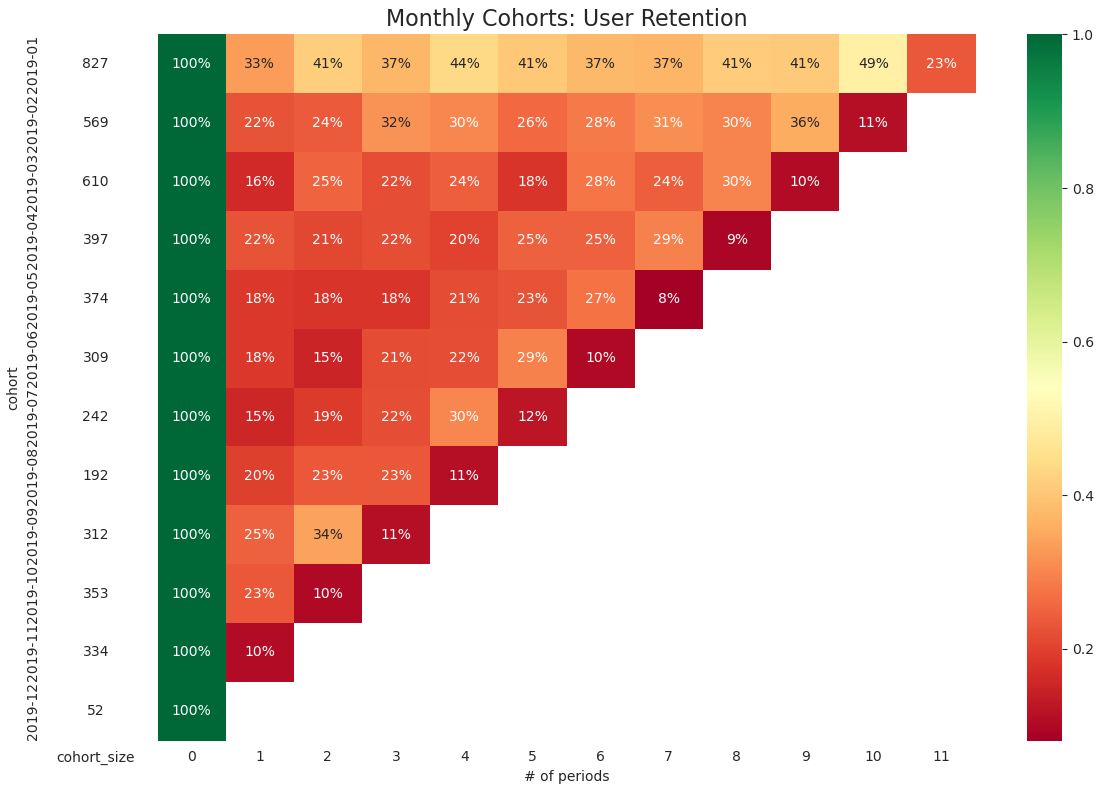

In [23]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

## Pertanyaan<a href="#Pertanyaan" class="anchor-link">¶</a>

1.  Bagaimana karakteristik pertumbuhan customer baru? Apakah
    pertumbuhan terus meningkat atau melambat?

Melambat.

-Pada bulan Januari 2019 customer baru yang kembali melakukan transaksi bisa menyentuh  angka 49%. Namun dari bulan Febuari hingga Desember 2019, customer yang kembli melakukan transaksi mengalami penurunan dan pertumbuhannya tidak stabil, yakni kisaran di angka 10%-36%.

-Jika dilihat secara keseluruhan, dari Januari hingga Desember 2019, peiode akhir customer kembali melakukan tansaksi sangat rendah dan sulit naik, hanya di kisaan 8%-23%.

2.  Setiap bulannya tim marketing menggunakan metode promosi campaign
    yang berbeda-beda. Bulan mana yang menghasilkan retention paling
    tinggi?

Januari 2019

# Time Series Analysis<a href="#Time-Series-Analysis" class="anchor-link">¶</a>

Time series analysis adalah analisis untuk melihat trend suatu fenomena
berdasarkan waktu.

## Pertanyaan<a href="#Pertanyaan" class="anchor-link">¶</a>

Pertanyaan 1 :  
Coba totalkan penjualan setiap barang per hari.  Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan,
atau stagnant.

-Secara keseluruhan mengalami penurunan

-Penjualan produk tebanyak di tanggal 8, dan penjualan terendah di tanggal 26.

-Pada tanggal 8 dan 17, produk terjual sangat banyak, namun setelah itu langsung turun drastis.

In [115]:
date_col = pd.DatetimeIndex(df_sales['Date'])
df_sales['year'] = date_col.year 
df_sales['month'] = date_col.month 
df_sales['day'] = date_col.day 
df_sales['day_name'] = df_sales['Date'].dt.day_name()

In [25]:
# Product order per day
df_total_product_order_per_day = df_sales.groupby('day')['Quantity'].count()
df_total_product_order_per_day

day
1     17056
2     16302
3     14101
4     19155
5     21612
6     23399
7     22390
8     24013
9     17681
10    19328
11    17929
12    13680
13    17934
14    17552
15    15337
16    15304
17    22403
18    18530
19    12782
20    18754
21    18630
22    15800
23    17380
24    16382
25    15875
26    10245
27    14581
28    16733
29    11708
30    15090
31    10099
Name: Quantity, dtype: int64

<Axes: xlabel='day'>

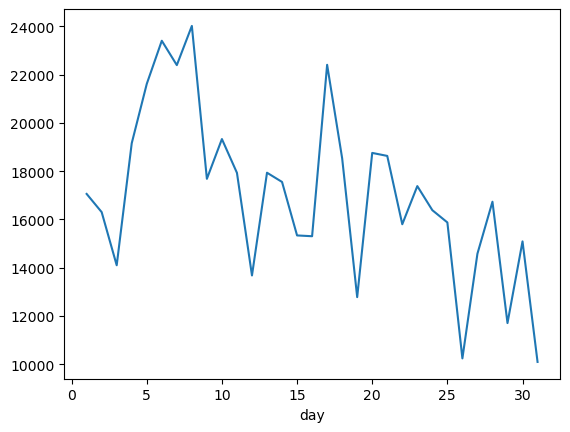

In [26]:
df_total_product_order_per_day.plot(kind='line')

Pertanyaan 2 :  
Lakukan analisis seasonality dengan melihat total order per harinya dari
Senin hingga Minggu.

-Order tertinggi terjadi pada hari minggu, dan order terendah di hari rabu

In [27]:
# Product order weekly
df_day_order = df_sales.groupby('day_name')['Quantity'].count().sort_values(ascending=False)
df_day_order

day_name
Sunday       100509
Friday        99115
Thursday      92676
Saturday      91889
Monday        79834
Wednesday     63742
Name: Quantity, dtype: int64

<Axes: xlabel='day_name'>

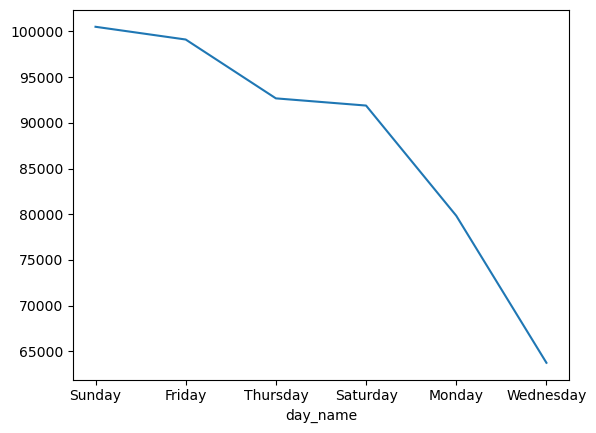

In [28]:
df_day_order.plot(kind='line')

# Price Elasticity<a href="#Price-Elasticity" class="anchor-link">¶</a>

Price sensitivity atau sensitifitas harga mengacu pada perubahan
permintaan pelanggan akibat naik atau turunya harga suatu produk.

Pada bagian ini anda akan diminta untuk melakukan analisis terhadap
suatu produk yang penjualannya sangat dipengaruhi oleh harga.

## Pertanyaan<a href="#Pertanyaan" class="anchor-link">¶</a>

Pertanyaan 1 :  
Produk apa yang paling sering mengalami perubahan harga?  
Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk
yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

Price Elasticity akan semakin baik dianalisis ketika lebih banyak
variasi harga yang muncul.

In [29]:
df_sales["% Change in Demand"] = df_sales["Quantity"].pct_change().round(2)
df_sales["% Change in Price"] = df_sales["Price"].pct_change().round(2)
df_sales["Price Elasticity"] = df_sales["% Change in Demand"] / df_sales["% Change in Price"].sort_values(ascending=True).round(1)

In [85]:
df_20_sampel = df_sales.sample(20)
df_20_sampel

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,total_revenue,quantity_category,total_revenue_category,final_segmentation,year,month,day,day_name,% Change in Demand,% Change in Price,Price Elasticity,customer_finish
272961,560255,2019-07-17,48129,Doormat Topiary,18.40,1,16054.0,United Kingdom,18.40,Populer,Populer,Super Populer,2019,7,17,Wednesday,0.00,0.00,NaN,0.001146
131822,572081,2019-10-20,23378,Pack Of 12 50'S Christmas Tissues,10.65,24,16592.0,United Kingdom,255.60,Populer,Populer,Super Populer,2019,10,20,Sunday,1.00,-0.04,-inf,0.015405
169867,569026,2019-09-30,22745,Poppy's Playhouse Bedroom,12.40,6,16101.0,United Kingdom,74.40,Populer,Populer,Super Populer,2019,9,30,Monday,0.00,-0.07,-0.000000,0.004621
385367,549667,2019-04-11,21042,Red Retrospot Apron,16.35,3,14911.0,EIRE,49.05,Populer,Populer,Super Populer,2019,4,11,Thursday,-0.50,0.16,-2.500000,0.003290
86630,575689,2019-11-10,23344,Jumbo Bag 50'S Christmas,6.19,10,14829.0,United Kingdom,61.90,Populer,Populer,Super Populer,2019,11,10,Sunday,-0.17,-0.50,0.340000,0.004174
263191,561050,2019-07-24,23284,Doormat Keep Calm And Come In,18.40,2,16558.0,United Kingdom,36.80,Populer,Populer,Super Populer,2019,7,24,Wednesday,-0.92,0.66,-1.314286,0.002222
86753,575694,2019-11-10,23119,Pack Of 6 Large Fruit Straws,10.89,2,12748.0,United Kingdom,21.78,Populer,Populer,Super Populer,2019,11,10,Sunday,1.00,-0.18,-5.000000,0.001709
111671,573585,2019-10-31,21817,Glitter Christmas Tree,11.92,1,14585.0,United Kingdom,11.92,Populer,Rendah,Low,2019,10,31,Thursday,-0.96,-0.12,9.600000,0.000817
419345,546423,2019-03-13,21386,Ivory Hanging Decoration Egg,11.12,1,14502.0,United Kingdom,11.12,Populer,Rendah,Low,2019,3,13,Wednesday,-0.75,0.00,-inf,0.000767
317757,556204,2019-06-09,47590A,Blue Happy Birthday Bunting,15.84,3,17169.0,United Kingdom,47.52,Populer,Populer,Super Populer,2019,6,9,Sunday,-0.50,0.23,-2.500000,0.002768


Pertanyaan 2 :  
Dari semua produk yang terambil dari step 1, hitung lah korelasi antara
harga dengan quantity untuk setiap barang.  
Barang manakah yang memiliki korelasi paling negatif?

In [79]:
correlation = df_20_sampel['Price'].corr(df_20_sampel['Quantity']).round(2)
correlation

-0.13

In [80]:
df_sales_matrix = df_20_sampel.corr().round(2)
df_sales_matrix

C:\Users\User\AppData\Local\Temp\ipykernel_180\3504037806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sales_matrix = df_20_sampel.corr().round(2)


,Price,Quantity,CustomerNo,total_revenue,year,month,day,% Change in Demand,% Change in Price,Price Elasticity,customer_finish
Price,1.00,-0.13,-0.15,0.24,0.07,-0.44,-0.19,-0.20,0.42,0.19,0.26
Quantity,-0.13,1.00,0.03,0.89,0.12,0.10,0.05,0.78,0.45,-0.04,0.88
CustomerNo,-0.15,0.03,1.00,0.01,0.40,-0.04,0.17,-0.11,0.06,0.02,-0.13
total_revenue,0.24,0.89,0.01,1.00,0.13,0.02,0.02,0.69,0.71,0.14,0.99
year,0.07,0.12,0.40,0.13,1.00,-0.30,0.12,0.01,0.24,0.15,0.09
month,-0.44,0.10,-0.04,0.02,-0.30,1.00,0.12,0.18,-0.00,0.15,-0.02
day,-0.19,0.05,0.17,0.02,0.12,0.12,1.00,-0.19,-0.19,-0.29,-0.05
% Change in Demand,-0.20,0.78,-0.11,0.69,0.01,0.18,-0.19,1.00,0.56,0.34,0.72
% Change in Price,0.42,0.45,0.06,0.71,0.24,-0.00,-0.19,0.56,1.00,0.55,0.71
Price Elasticity,0.19,-0.04,0.02,0.14,0.15,0.15,-0.29,0.34,0.55,1.00,0.18


Pertanyaan 3 : Buatlah scatter plot antara harga dan quantity untuk
barang dari soal sebelumnya.  
Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang
akan terjadi dengan penjualan ? Jika harga naik, maka pembelian barang akan cenderung menurun.

<Axes: xlabel='Quantity', ylabel='Price'>

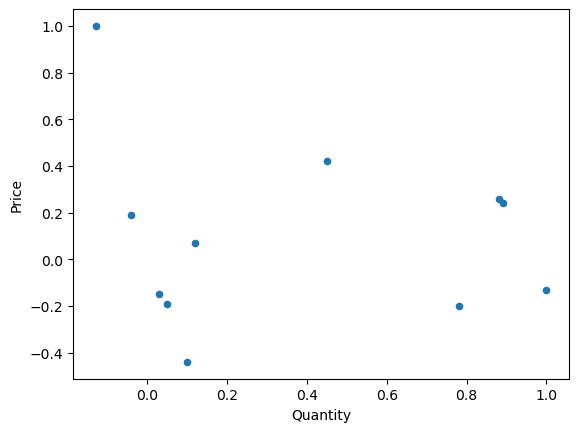

In [81]:
df_sales_matrix.plot(x='Quantity',y='Price',kind='scatter')

# Basket Size Analysis<a href="#Basket-Size-Analysis" class="anchor-link">¶</a>

Ketika seorang pelanggan e-commerce menekan "add to cart", maka barang
tersebut akan disimpan dalam sebuah "basket".  
Ketika melakukan checkout, maka semua barang dalam basket tersebut akan
diproses dan dikirimkan.  
Ukuran dari basket dapat diukur melalui nilai GMV (Gross merchandise
volume) yang merupakan total harga barang yang dibeli.  
Contoh : Pada tanggal 1 januari 2012 Tuan A membeli 1 shampoo seharga
15ribu dan 2 sabun seharga 20ribu masing-masing. Maka basket size tuan A
adalah 55ribu rupiah. Nyonya B hanya membeli 1 cemilan seharga 20 ribu,
maka basket size dari nyonya B adalah 20 ribu rupiah. Berarti total GMV
ecommerce pada 1 januari 2012 adalah 75ribu rupiah, dengan rata-rata
basket size sebesar 37.5 ribu rupiah per basket.

## Pertanyaan<a href="#Pertanyaan" class="anchor-link">¶</a>

1.  Hitung rata-rata basket size dari seluruh transaksi per harinya,
    apakah konsisten atau ada perubahan ?
    
    Ada perubahan
    
    -Basket size tertinggi di tanggal 18 dan terendah di tanggal 31
    
    -Secara keseluruhan basket size dari tanggal 1 hingga  18 ada kenaikan, meskipun ada juga penurunan.
    
    -Namun setelah tanggal 18 basket size terus mengalami penurunan hingga tanggal 31.

In [38]:
df_sales['customer_finish'] = df_sales['total_revenue'] / df_sales['CustomerNo']

In [39]:
df_day_basket_size = df_sales.groupby('day')['customer_finish'].sum().round(0)
df_day_basket_size

day
1     130.0
2     116.0
3     125.0
4     157.0
5     163.0
6     156.0
7     172.0
8     141.0
9     198.0
10    141.0
11    169.0
12    110.0
13    131.0
14    164.0
15    140.0
16    131.0
17    165.0
18    221.0
19    123.0
20    167.0
21    156.0
22    122.0
23    108.0
24    119.0
25    114.0
26     89.0
27    108.0
28    132.0
29     81.0
30     90.0
31     77.0
Name: customer_finish, dtype: float64

<Axes: xlabel='day'>

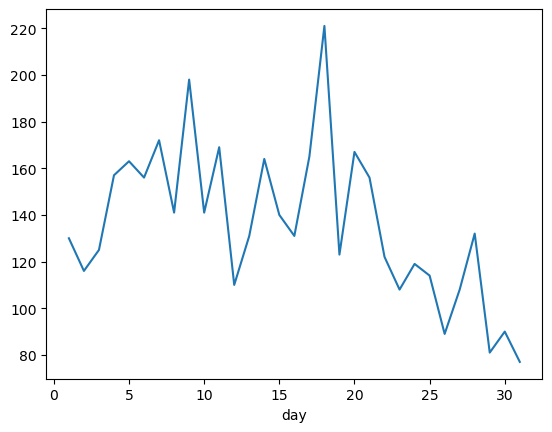

In [40]:
df_day_basket_size.plot(kind='line')

2.  Apakah ada perbedaan ukuran basket dari negara yang berbeda ? 
Ada, basket size tertinggi ada di negara United Kingdom dan terendah ada di negara Saudi Arabia.

In [41]:
df_day_basket_size = df_sales.groupby('Country')['customer_finish'].sum().round(1).sort_values(ascending=False)
df_day_basket_size

Country
United Kingdom          3441.3
Netherlands              147.3
EIRE                     117.9
Germany                  108.6
France                   104.8
Australia                 80.2
Switzerland               28.7
Sweden                    23.9
Japan                     23.0
Spain                     22.4
Belgium                   21.8
Norway                    15.1
Portugal                  13.9
Finland                    9.7
Denmark                    8.1
Channel Islands            6.4
Italy                      6.1
Austria                    5.5
Cyprus                     5.0
Singapore                  5.0
Israel                     4.2
Iceland                    3.1
USA                        2.6
Unspecified                2.2
Canada                     1.8
Hong Kong                  1.7
Poland                     1.6
Malta                      0.8
United Arab Emirates       0.8
Greece                     0.7
Czech Republic             0.6
Lithuania                  0.5


# Crucial Question<a href="#Crucial-Question" class="anchor-link">¶</a>

Ini adalah 5 pertanyaan utama yang ditanyakan oleh pembuat dataset sales
ini.  
Anda dapat menggunakan analisis yang sudah dikerjakan pada bagian
sebelumnya, ataupun melakukan analisis baru untuk menjawab pertanyaan
dibawah.

1. How was the sales trend over the months? 

-Terus mengalami kenaikan terutama dari bulan Agustus 2019 hingga November 2019.


-Meskipun pada bulan sebelumnya, yaitu Januari hingga Juli 2019, penjualannya mengalami naik turun, namun penururnanya tidak begitu signifikan.

In [42]:
# Product order per day
df_total_product_order_per_month = df_sales.groupby('month')['Quantity'].count()
df_total_product_order_per_month

month
1     34137
2     26991
3     35644
4     28936
5     36015
6     35807
7     38398
8     34318
9     49007
10    59041
11    83042
12    66429
Name: Quantity, dtype: int64

<Axes: xlabel='month'>

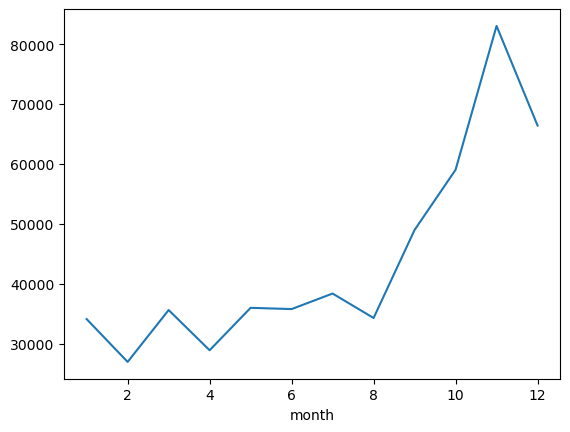

In [43]:
df_total_product_order_per_month.plot(kind='line')

2. What are the most frequently purchased products? Cream Hanging Heart T-Light Holder 

In [104]:
bestseller_product_2018_to_2019 = df_sales.groupby('ProductNo')['Quantity'].count().sort_values(ascending=False)
bestseller_product_2018_to_2019

ProductNo
85123A    2336
85099B    2115
22423     2019
47566     1708
20725     1597
          ... 
20964        1
85115B       1
35004P       1
21009        1
90025B       1
Name: Quantity, Length: 3753, dtype: int64

3. How many products does the customer purchase in each transaction? Maksimal 7835, dan minimal 1

In [45]:
purchase_per_customer = df_sales.groupby('CustomerNo')['TransactionNo'].count().sort_values(ascending=False)
purchase_per_customer

CustomerNo
17841.0    7835
14911.0    5580
14096.0    5093
12748.0    4584
14606.0    2692
           ... 
15375.0       1
13256.0       1
16990.0       1
18113.0       1
13391.0       1
Name: TransactionNo, Length: 4718, dtype: int64

4. What are the most profitable segment customers?

5. Based on your findings, what strategy could you recommend to the business to gain more profit?